## **ML :** Customer Churn

#### _Customer Churn Dataset_

🟠 `on work`

---

1. **Preprocessing**
    * Extractions des variables
    * Proto-modélisation
    * Supression des valeurs aberrantes
    * Feature Selection
    * Feature Engineering
    * Feature Scaling
2. **Modeling**
    * Fonction d’évaluation
    * Entrainements multiples modèles
    * Optimisation
    * Analyse des erreurs
    * Courbe d'aprentissage
    * Décision

**Librairies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**ML objects**

In [99]:
# Models
# • DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# • RandomForest
# from sklearn.ensemble import RandomForestClassifier
# - -
# Evaluation, tuning, etc.
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# - -
# Preprocessing
from sklearn.preprocessing import LabelEncoder
# - -
# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import precision_score

**User Code**

In [91]:
# Reserved keywords for objects
df = pd.DataFrame
le = LabelEncoder
cm = confusion_matrix
cm_d = ConfusionMatrixDisplay
cr = classification_report

In [105]:
def extract_x_y(dataframe:pd.DataFrame, target:str|list[str]) -> tuple :
    """Extract Features and Target from dataset

    Args:
        dataframe (pd.DataFrame): Dataframe to extract columns from
        target (str | list[str]): Target name

    Returns:
        tuple: Feature as X, and Label as y
    """

    y = dataframe[target] 
    X = dataframe.drop(columns=target)

    display(
        y.unique(),
        X
    )

    return X, y

**Notebook setup**

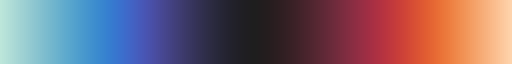

In [59]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Limon
    '#e60073' # Magenta
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, ...
sns.color_palette("icefire", as_cmap=True)

**Customer Churn**

(_no url_)

In [103]:
# (!) - Version 1
churn_1_file_path = './_datasets/churn_data_prepare_1.csv'
churn_1_data = pd.read_csv(churn_1_file_path)
churn_1_data['Exited'] = churn_1_data['Exited'].astype('category')

churn_1_data

,CreditScore,Geography,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,42,0.00,1,1,Yes
1,608,Spain,41,83807.86,1,1,No
2,502,France,42,159660.80,3,0,Yes
...,...,...,...,...,...,...,...
9997,709,France,36,0.00,1,1,Yes
9998,772,Germany,42,75075.31,2,0,Yes
9999,792,France,28,130142.79,1,0,No


In [104]:
# (!) - Version 2
churn_2_file_path = './_datasets/churn_data_prepare_2.csv'
churn_2_data = pd.read_csv(churn_2_file_path)
churn_2_data['Exited'] = churn_2_data['Exited'].astype('category')

churn_2_data

,Geography,Age,Balance,IsActiveMember,Exited
0,France,42,0.00,1,Yes
1,Spain,41,83807.86,1,No
2,France,42,159660.80,0,Yes
...,...,...,...,...,...
9997,France,36,0.00,1,Yes
9998,Germany,42,75075.31,0,Yes
9999,France,28,130142.79,0,No


---

### **1.** Preprocessing

##### **1.1** - Préparations et extractions

Extraction des _Features_ et du _Label_

In [106]:
# (!) - Extraction from Set 1
X_1, y_1 = extract_x_y(churn_1_data, 'Exited')

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

,CreditScore,Geography,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,42,0.00,1,1
1,608,Spain,41,83807.86,1,1
2,502,France,42,159660.80,3,0
...,...,...,...,...,...,...
9997,709,France,36,0.00,1,1
9998,772,Germany,42,75075.31,2,0
9999,792,France,28,130142.79,1,0


In [107]:
# (!) - Extraction from Set 2
X_2, y_2 = extract_x_y(churn_2_data, 'Exited')

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

,Geography,Age,Balance,IsActiveMember
0,France,42,0.00,1
1,Spain,41,83807.86,1
2,France,42,159660.80,0
...,...,...,...,...
9997,France,36,0.00,1
9998,Germany,42,75075.31,0
9999,France,28,130142.79,0


Encodage des variables quantitatives

In [108]:
# (!) - Encode 'Geography' as numerical values
le = LabelEncoder()
le.fit(X_1['Geography'])
X_1['Geography'] = le.transform(X_1['Geography'])

X_1['Geography'].unique()

array([0, 2, 1])

In [109]:
le.fit(X_2['Geography'])
X_2['Geography'] = le.transform(X_2['Geography'])

X_2['Geography'].unique()

array([0, 2, 1])

Isolation des données d'entrainement et de test

In [114]:
# (!) - 25 % for test
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=.25, random_state=5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=.25, random_state=5)

display(
    f"Ver. 1 :: train {X1_train.shape} - test {X1_test.shape}",
    f"Ver. 2 :: train {X2_train.shape} - test {X2_test.shape}"
)

'Ver. 1 :: train (7500, 6) - test (2500, 6)'

'Ver. 2 :: train (7500, 4) - test (2500, 4)'

In [116]:
# (!) - Both labels have same division and same % of `No`
pd.concat([
    pd.DataFrame({
    'Label Entrainement 1': y1_train.describe(),
    'Label Test 1': y1_test.describe()
    }),
    pd.Series([
        (y1_train.describe()[3] / y1_train.count()) * 100,
        (y1_test.describe()[3] / y1_test.count()) * 100
    ], name='percent of no', index=['Label Entrainement 1', 'Label Test 1']).to_frame().T
])

,Label Entrainement 1,Label Test 1
count,7500,2500
unique,2,2
top,No,No
freq,5964,1999
percent of no,79.52,79.96


In [117]:
# (!) - Both labels have same division and same % of `No`
pd.concat([
    pd.DataFrame({
    'Label Entrainement 2': y2_train.describe(),
    'Label Test 2': y2_test.describe()
    }),
    pd.Series([
        (y2_train.describe()[3] / y2_train.count()) * 100,
        (y2_test.describe()[3] / y2_test.count()) * 100
    ], name='percent of no', index=['Label Entrainement 2', 'Label Test 2']).to_frame().T
])

,Label Entrainement 2,Label Test 2
count,7500,2500
unique,2,2
top,No,No
freq,5964,1999
percent of no,79.52,79.96


##### **1.2** - Proto-modélisation `v.1`

Définition et entrainement

In [118]:
# (!) - Predictions as Classifications
v1_DT = DecisionTreeClassifier()
v1_DT.fit(X1_train, y1_train)

DecisionTreeClassifier()

Prédictions et résultats sur `X1_train`

In [119]:
# (!) - Almost equal between predictions and answers
v1_train_predictions = v1_DT.predict(X1_train)

df = pd.DataFrame({
    'Prédictions': v1_train_predictions,
    'Réponses': y1_train,
    'Egalité': (v1_train_predictions == y1_train)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
168,No,Yes,False
9898,No,Yes,False
9482,No,Yes,False


Mesures sur `X1_train`

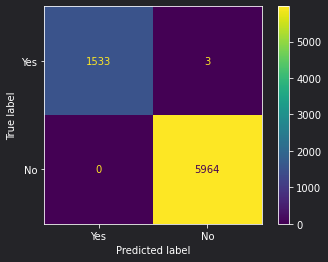

In [189]:
# (!) - 3 bad predictions for 'Exited' = `Yes`
cm = confusion_matrix(y1_train, v1_train_predictions, labels=['Yes', 'No'])

pd.DataFrame({
    'Yes': [cm[0,0], cm[1,0]],
    'No': [cm[1,0], cm[1,1]]
}, index=['True Yes', 'True No']).to_csv('./_outputs/cm_train_v1.csv')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [127]:
# (!) - Not as good as expected... o_O
v1_DT.score(X1_train, y1_train)

0.9996

In [131]:
# (!) - Report is good
cr = classification_report(y1_train, v1_train_predictions)

file = open('./_outputs/cr_train_v1.txt', 'x')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5964
         Yes       1.00      1.00      1.00      1536

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



Prédictions et résultats sur `X1_test`

In [132]:
# (!) - 504 bad predictions
v1_test_predictions = v1_DT.predict(X1_test)

df = pd.DataFrame({
    'Prédictions': v1_test_predictions,
    'Réponses': y1_test,
    'Egalité': (v1_test_predictions == y1_test)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
8351,Yes,No,False
1805,Yes,No,False
837,Yes,No,False
...,...,...,...
8244,Yes,No,False
5542,No,Yes,False
2584,Yes,No,False


Mesures sur `X1_test`

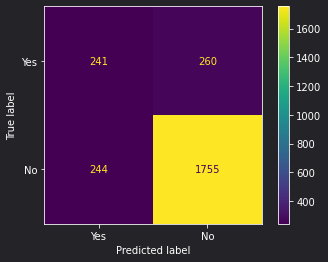

In [190]:
# (!) - Just bad ! 
cm = confusion_matrix(y1_test, v1_test_predictions, labels=['Yes', 'No'])

pd.DataFrame({
    'Yes': [cm[0,0], cm[1,0]],
    'No': [cm[1,0], cm[1,1]]
}, index=['True Yes', 'True No']).to_csv('./_outputs/cm_test_v1.csv')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [134]:
# (!) - Very bad
v1_DT.score(X1_test, y1_test)

0.7984

In [135]:
# (!) - Really Bad...
cr = classification_report(y1_test, v1_test_predictions)

file = open('./_outputs/cr_test_v1.txt', 'x')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       0.87      0.88      0.87      1999
         Yes       0.50      0.48      0.49       501

    accuracy                           0.80      2500
   macro avg       0.68      0.68      0.68      2500
weighted avg       0.80      0.80      0.80      2500



Aperçu final

In [ ]:
# (!) - Awful !!!
plt.figure(figsize=(48,48))
plot_tree(v1_DT, feature_names=X1_train.columns, filled=True)
plt.show()

##### **1.3** - Proto-modélisation `v.2`

Définition et entrainement

In [136]:
# (!) - Predictions as Classifications
v2_DT = DecisionTreeClassifier()
v2_DT.fit(X2_train, y2_train)

DecisionTreeClassifier()

Prédictions et résultats sur `X2_train`

In [137]:
# (!) - 304 bad predictions
v2_train_predictions = v2_DT.predict(X2_train)

df = pd.DataFrame({
    'Prédictions': v2_train_predictions,
    'Réponses': y2_train,
    'Egalité': (v2_train_predictions == y2_train)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
2553,No,Yes,False
6627,No,Yes,False
9865,Yes,No,False
...,...,...,...
4734,No,Yes,False
9613,No,Yes,False
3693,No,Yes,False


Mesures sur `X2_train`

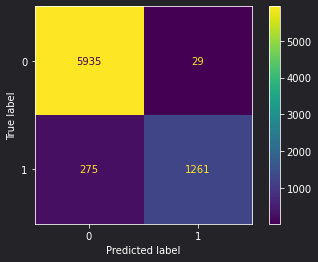

In [191]:
# (!) - 29 bad predictions on 'Exited' = `No`, and 275 on 'Exited' = `Yes`
cm = confusion_matrix(y2_train, v2_train_predictions)

pd.DataFrame({
    'Yes': [cm[0,0], cm[1,0]],
    'No': [cm[1,0], cm[1,1]]
}, index=['True Yes', 'True No']).to_csv('./_outputs/cm_train_v2.csv')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [139]:
# (!) - Not as good as v1 score
v2_DT.score(X2_train, y2_train)

0.9594666666666667

In [140]:
# (!) - Report is unaccurate
cr = classification_report(y2_train, v2_train_predictions)

file = open('./_outputs/cr_train_v2.txt', 'x')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       0.96      1.00      0.98      5964
         Yes       0.98      0.82      0.89      1536

    accuracy                           0.96      7500
   macro avg       0.97      0.91      0.93      7500
weighted avg       0.96      0.96      0.96      7500



Prédictions et résultats sur `X2_test`

In [141]:
# (!) - 533 bad predictions
v2_test_predictions = v2_DT.predict(X2_test)

df = pd.DataFrame({
    'Prédictions': v2_test_predictions,
    'Réponses': y2_test,
    'Egalité': (v2_test_predictions == y2_test)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
5658,No,Yes,False
413,No,Yes,False
1805,Yes,No,False
...,...,...,...
9743,Yes,No,False
6143,Yes,No,False
6949,Yes,No,False


Mesures sur `X2_test`

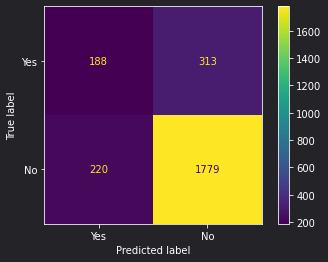

In [192]:
# (!) - More errors on 'Exited' = `Yes`, but less on 'Exited' = `No`
cm = confusion_matrix(y2_test, v2_test_predictions, labels=['Yes', 'No'])

pd.DataFrame({
    'Yes': [cm[0,0], cm[1,0]],
    'No': [cm[1,0], cm[1,1]]
}, index=['True Yes', 'True No']).to_csv('./_outputs/cm_test_v2.csv')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [143]:
# (!) - A bit lower than v1
v2_DT.score(X2_test, y2_test)

0.7868

In [144]:
# (!) - Really Bad...
cr = classification_report(y2_test, v2_test_predictions)

file = open('./_outputs/cr_test_v2.txt', 'x')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1999
         Yes       0.46      0.38      0.41       501

    accuracy                           0.79      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.77      0.79      0.78      2500



##### **1.4** - Comparaisons

In [193]:
version_1 = pd.read_csv('./_outputs/cm_test_v1.csv')
version_1.rename(columns={'Unnamed: 0': 'Version 1'}, inplace=True)
version_2 = pd.read_csv('./_outputs/cm_test_v2.csv')
version_2.rename(columns={'Unnamed: 0': 'Vesrion 2'}, inplace=True)

display(
    version_1,
    version_2
)

,Version 1,Yes,No
0,True Yes,241,244
1,True No,244,1755


,Vesrion 2,Yes,No
0,True Yes,188,220
1,True No,220,1779


---

### **2.** Modeling

##### **2.1** - Modèle 1 

Définition et entrainement

In [ ]:
# (!) - 
# m1_DT = DecisionTreeClassifier(max_depth=3)
# m1_DT.fit(X_train, y_train)

Prédictions

In [ ]:
# (!) - 
# m1_predictions = m1_DT.predict(X_test)

# m1_predictions

Mesures

In [ ]:
# (!) - 
# cm = confusion_matrix(y_test, m1_predictions, labels=['Yes', 'No'])

# cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
# cm_d.plot()
# plt.show()

In [ ]:
# (!) -
# m1_DT.score(X_test, y_test)

In [ ]:
# (!) -
# cr = classification_report(y_test, m1_predictions)

# print(cr)

Aperçu

In [ ]:
# (!) - 
# plt.figure(figsize=(24,24))
# plot_tree(m1_DT, feature_names=X_train.columns, filled=True)
# plt.show()

##### **2.2** - Modèle 2 `GridSearchCV`

Définition et entrainement

In [ ]:
# (!) - 
# m2_DT = DecisionTreeClassifier()

In [ ]:
# (!) -
# params = {'max_depth': [1, 2, 3, 4], 'criterion': ['gini', 'entropy']}
# m2_grid = GridSearchCV(v3_DT, param_grid=params, verbose=1)

# m2_grid.fit(X_train, y_train)